# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter # Import ScalarFormatter for axis formatting

In [2]:
# read instagram
insta_df = pd.read_csv('./Clean_Data/merged_instagram_data_cleaned.csv')

# read tiktok
tiktok_df = pd.read_csv('./Clean_Data/merged_tiktok_data_cleaned.csv')

# read youtube
youtube_df = pd.read_csv('./Clean_Data/merged_youtube_data_cleaned.csv')

In [3]:
def calculate_engagement_rate(row, like_col, comment_col, subscriber_col, view_col=None, share_col=None):
    likes = row[like_col] if like_col in row else 0
    comments = row[comment_col] if comment_col in row else 0
    views = row[view_col] if view_col in row else 0
    shares = row[share_col] if share_col in row else 0
    subscribers = row[subscriber_col] if subscriber_col in row else 0

    total_engagement = likes + comments + views + shares

    if subscribers > 0:
        return (total_engagement / subscribers) * 100
    else:
        return 0  # Or return np.nan or some other value

In [4]:
def compare_engagement_across_platforms(insta_df, tiktok_df, youtube_df):
    engagement_data = []

    # Inside the Instagram processing block
    if insta_df is not None and 'likes_avg' in insta_df.columns and 'comments_avg' in insta_df.columns and 'subscribers' in insta_df.columns and 'instagram_name' in insta_df.columns:
        print("\nData types for Instagram engagement columns:")
        print(f"likes_avg: {insta_df['likes_avg'].dtype}")
        print(f"comments_avg: {insta_df['comments_avg'].dtype}")
        if 'views_avg' in insta_df.columns:
            print(f"views_avg: {insta_df['views_avg'].dtype}")
        if 'shares_avg' in insta_df.columns:
            print(f"shares_avg: {insta_df['shares_avg'].dtype}")
        # ... rest of the Instagram processing code

    # Inside the TikTok processing block
    if tiktok_df is not None and 'likes_avg' in tiktok_df.columns and 'comments_avg' in tiktok_df.columns and 'subscribers' in tiktok_df.columns and 'tiktoker_name' in tiktok_df.columns:
        print("\nData types for TikTok engagement columns:")
        print(f"likes_avg: {tiktok_df['likes_avg'].dtype}")
        print(f"comments_avg: {tiktok_df['comments_avg'].dtype}")
        if 'views_avg' in tiktok_df.columns:
            print(f"views_avg: {tiktok_df['views_avg'].dtype}")
        if 'shares_avg' in tiktok_df.columns:
            print(f"shares_avg: {tiktok_df['shares_avg'].dtype}")
        # ... rest of the TikTok processing code

    # Inside the YouTube processing block
    if youtube_df is not None and 'avg_likes' in youtube_df.columns and 'avg_comments' in youtube_df.columns and 'subscribers' in youtube_df.columns and 'youtuber_name' in youtube_df.columns and 'avg_views' in youtube_df.columns:
        print("\nData types for YouTube engagement columns:")
        print(f"avg_likes: {youtube_df['avg_likes'].dtype}")
        print(f"avg_comments: {youtube_df['avg_comments'].dtype}")
        if 'avg_views' in youtube_df.columns:
            print(f"avg_views: {youtube_df['avg_views'].dtype}")
        if 'shares_avg' in youtube_df.columns: # Assuming you might have a shares column for YouTube later
            print(f"shares_avg: {youtube_df['shares_avg'].dtype}")
        # ... rest of the YouTube processing code
    elif youtube_df is not None and 'likes_avg' in youtube_df.columns and 'comments_avg' in youtube_df.columns and 'subscribers' in youtube_df.columns and 'youtuber_name' in youtube_df.columns and 'views_avg' in youtube_df.columns:
        print("\nData types for YouTube engagement columns (alternative):")
        print(f"likes_avg: {youtube_df['likes_avg'].dtype}")
        print(f"comments_avg: {youtube_df['comments_avg'].dtype}")
        if 'views_avg' in youtube_df.columns:
            print(f"views_avg: {youtube_df['views_avg'].dtype}")

    if engagement_data:
        engagement_df = pd.DataFrame(engagement_data)
        engagement_df['engagement_rate'] = engagement_df['engagement_rate'].replace([np.inf, -np.inf], np.nan).dropna()

        print("\n--- Comparative Analysis of Engagement Across Platforms ---")
        print("\nAverage Engagement Rate by Platform:")
        print(engagement_df.groupby('platform')['engagement_rate'].mean().sort_values(ascending=False))

        plt.figure(figsize=(10, 7))
        sns.boxplot(x='platform', y='engagement_rate', data=engagement_df)
        plt.title('Comparison of Engagement Rates Across Platforms')
        plt.xlabel('Platform')
        plt.ylabel('Engagement Rate (%)')
        plt.yscale('log') # Using log scale to handle potential outliers
        plt.show()

        plt.figure(figsize=(12, 8))
        sns.violinplot(x='platform', y='engagement_rate', data=engagement_df)
        plt.title('Distribution of Engagement Rates Across Platforms')
        plt.xlabel('Platform')
        plt.ylabel('Engagement Rate (%)')
        plt.yscale('log') # Using log scale to handle potential outliers
        plt.show()
    else:
        print("Could not calculate engagement rate for any of the platforms due to missing data.")

# Assuming your DataFrames are named insta_df, tiktok_df, youtube_df
compare_engagement_across_platforms(insta_df, tiktok_df, youtube_df)


Data types for Instagram engagement columns:
likes_avg: object
comments_avg: object
views_avg: object

Data types for TikTok engagement columns:
likes_avg: float64
comments_avg: float64
views_avg: float64
shares_avg: float64

Data types for YouTube engagement columns:
avg_likes: float64
avg_comments: float64
avg_views: float64
Could not calculate engagement rate for any of the platforms due to missing data.


Instagram data loaded.
TikTok data loaded.
YouTube data loaded.
--- Starting Subscriber Analysis ---

--- Instagram Subscriber Summary (4933 rows) ---
count    4,933
mean         0
std          0
min          0
25%          0
50%          0
75%          0
max          0
Name: subscribers, dtype: object

Top 10 Instagram Influencers by Subscribers:
   influencer_name  subscribers  platform
         cristiano            0 Instagram
              MONT            0 Instagram
           Hyun Ah            0 Instagram
       LUÍSA SONZA            0 Instagram
Хабиб Нурмагомедов            0 Instagram
           HAECHAN            0 Instagram
    Marvel Studios            0 Instagram
              Ibai            0 Instagram
     Madhuri Dixit            0 Instagram
               유정연            0 Instagram

--- TikTok Subscriber Summary (3986 rows) ---
count    3,986
mean         0
std          0
min          0
25%          0
50%          0
75%          0
max          0
Name: subscribers, dt

C:\Users\lualg\AppData\Local\Temp\ipykernel_43400\160397620.py:94: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log') # Log scale is often necessary for subscriber counts


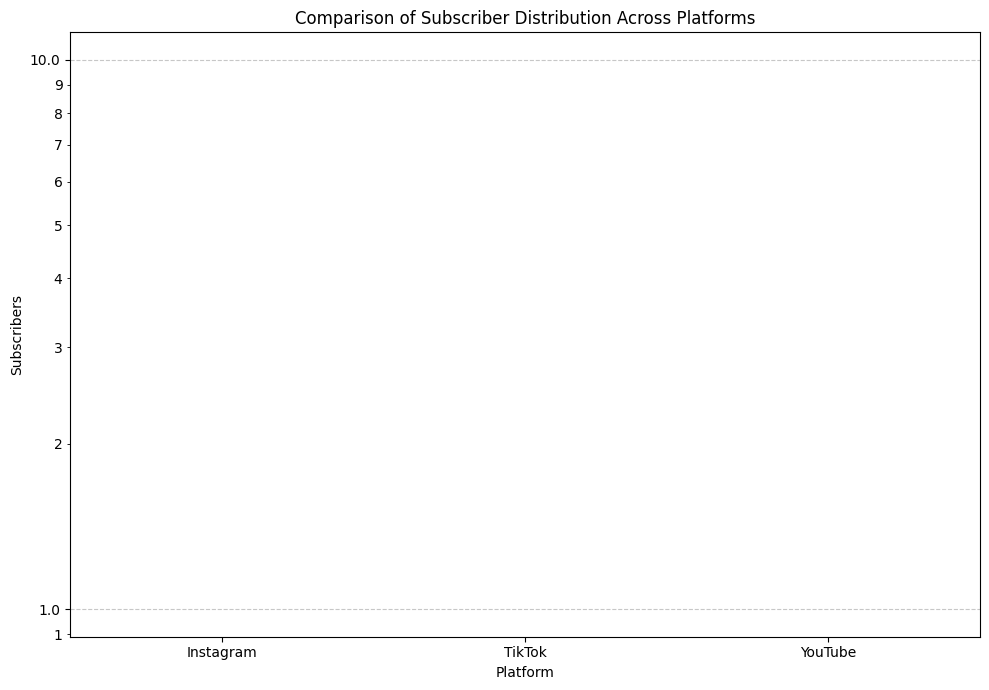

C:\Users\lualg\AppData\Local\Temp\ipykernel_43400\160397620.py:113: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


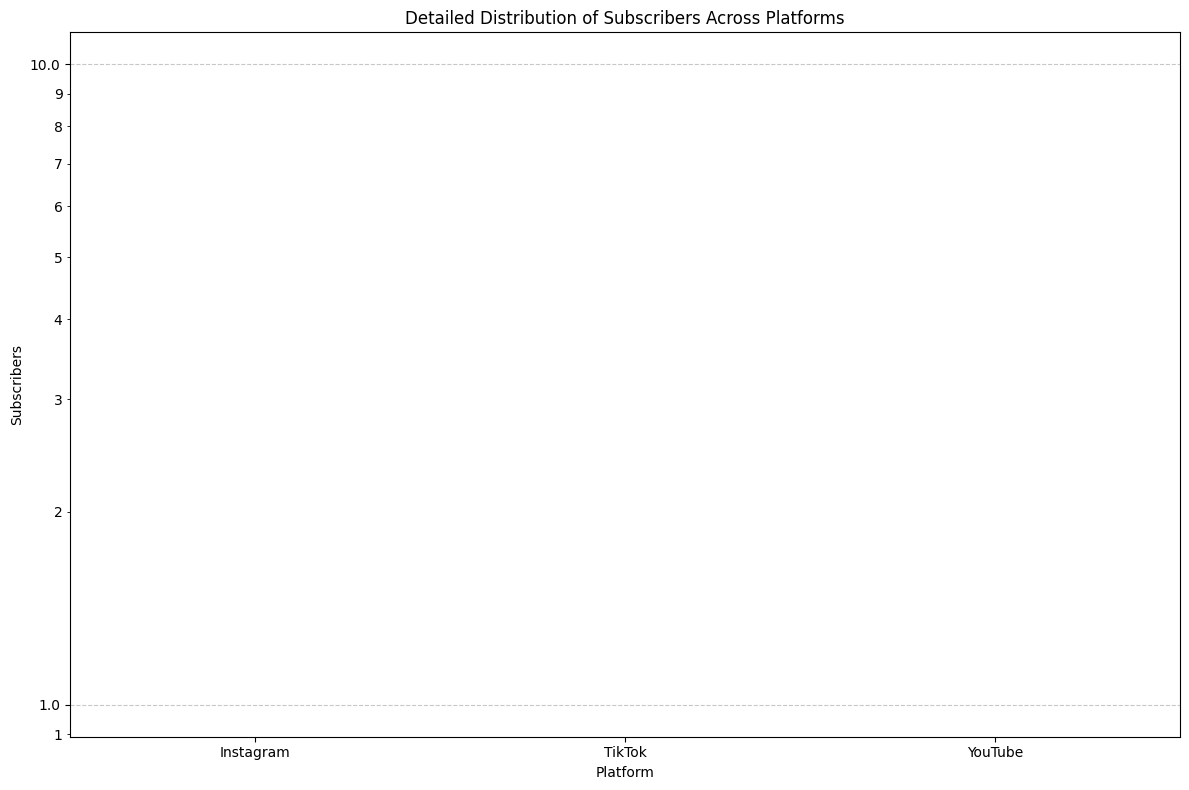

In [5]:
# --- 1. Define the Core Analysis Function (Subscriber-focused) ---
def compare_subscriber_distribution_and_top_influencers(insta_df, tiktok_df, youtube_df,
                                                       insta_subscriber_col='subscribers', insta_name_col='instagram_name',
                                                       tiktok_subscriber_col='subscribers', tiktok_name_col='tiktoker_name',
                                                       yt_subscriber_col='subscribers', yt_name_col='youtuber_name'):
    """
    Compares subscriber distribution and identifies top influencers across Instagram, TikTok, and YouTube.
    Focuses on raw subscriber counts as a primary metric for cross-platform comparison.

    Args:
        insta_df (pd.DataFrame): DataFrame containing Instagram influencer data.
        tiktok_df (pd.DataFrame): DataFrame containing TikTok influencer data.
        youtube_df (pd.DataFrame): DataFrame containing YouTube influencer data.
        insta_subscriber_col (str): Name of the subscribers column in insta_df.
        insta_name_col (str): Name of the influencer name column in insta_df.
        tiktok_subscriber_col (str): Name of the subscribers column in tiktok_df.
        tiktok_name_col (str): Name of the influencer name column in tiktok_df.
        yt_subscriber_col (str): Name of the subscribers column in youtube_df.
        yt_name_col (str): Name of the influencer name column in youtube_df.
    """
    # Initialize all_subscriber_data at the beginning of the function scope
    all_subscriber_data = []

    print("--- Starting Subscriber Analysis ---")

    # --- Process Instagram data ---
    if insta_df is not None and insta_subscriber_col in insta_df.columns and insta_name_col in insta_df.columns:
        temp_df = insta_df[[insta_name_col, insta_subscriber_col]].copy()
        temp_df.columns = ['influencer_name', 'subscribers'] # Standardize column names for concatenation
        temp_df['platform'] = 'Instagram'
        all_subscriber_data.append(temp_df)
        print(f"\n--- Instagram Subscriber Summary ({insta_df.shape[0]} rows) ---")
        # Ensure subscribers column is numeric for describe()
        temp_df['subscribers'] = pd.to_numeric(temp_df['subscribers'], errors='coerce')
        print(temp_df['subscribers'].describe().apply(lambda x: f"{x:,.0f}")) # Format for readability
        print(f"\nTop 10 Instagram Influencers by Subscribers:")
        print(temp_df.sort_values(by='subscribers', ascending=False).head(10).to_string(index=False)) # to_string for better print formatting
    else:
        print("Instagram data or key columns missing for subscriber analysis. Skipping Instagram.")

    # --- Process TikTok data ---
    if tiktok_df is not None and tiktok_subscriber_col in tiktok_df.columns and tiktok_name_col in tiktok_df.columns:
        temp_df = tiktok_df[[tiktok_name_col, tiktok_subscriber_col]].copy()
        temp_df.columns = ['influencer_name', 'subscribers'] # Standardize column names
        temp_df['platform'] = 'TikTok'
        all_subscriber_data.append(temp_df)
        print(f"\n--- TikTok Subscriber Summary ({tiktok_df.shape[0]} rows) ---")
        # Ensure subscribers column is numeric for describe()
        temp_df['subscribers'] = pd.to_numeric(temp_df['subscribers'], errors='coerce')
        print(temp_df['subscribers'].describe().apply(lambda x: f"{x:,.0f}")) # Format for readability
        print(f"\nTop 10 TikTok Influencers by Subscribers:")
        print(temp_df.sort_values(by='subscribers', ascending=False).head(10).to_string(index=False))
    else:
        print("TikTok data or key columns missing for subscriber analysis. Skipping TikTok.")

    # --- Process YouTube data ---
    if youtube_df is not None and yt_subscriber_col in youtube_df.columns and yt_name_col in youtube_df.columns:
        temp_df = youtube_df[[yt_name_col, yt_subscriber_col]].copy()
        temp_df.columns = ['influencer_name', 'subscribers'] # Standardize column names
        temp_df['platform'] = 'YouTube'
        all_subscriber_data.append(temp_df)
        print(f"\n--- YouTube Subscriber Summary ({youtube_df.shape[0]} rows) ---")
        # Ensure subscribers column is numeric for describe()
        temp_df['subscribers'] = pd.to_numeric(temp_df['subscribers'], errors='coerce')
        print(temp_df['subscribers'].describe().apply(lambda x: f"{x:,.0f}")) # Format for readability
        print(f"\nTop 10 YouTube Influencers by Subscribers:")
        print(temp_df.sort_values(by='subscribers', ascending=False).head(10).to_string(index=False))
    else:
        print("YouTube data or key columns missing for subscriber analysis. Skipping YouTube.")

    # --- Combine data for comparative visualization ---
    # This block will only execute if at least one platform had valid subscriber data
    if all_subscriber_data:
        combined_subscribers_df = pd.concat(all_subscriber_data, ignore_index=True)
        # Final cleanup for the combined DataFrame
        combined_subscribers_df['subscribers'] = pd.to_numeric(combined_subscribers_df['subscribers'], errors='coerce')
        combined_subscribers_df.dropna(subset=['subscribers'], inplace=True) # Drop rows where subscribers became NaN

        if combined_subscribers_df.empty:
            print("\nCombined subscriber DataFrame is empty after cleaning. Cannot generate plots.")
            return # Exit the function if no data to plot

        print("\n--- Comparative Subscriber Analysis Across Platforms ---")
        print("\nOverall Average Subscribers by Platform:")
        # Use .apply(lambda x: f"{x:,.0f}") for thousands comma separator
        print(combined_subscribers_df.groupby('platform')['subscribers'].mean().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

        # --- Box Plot: Subscriber Distribution ---
        plt.figure(figsize=(10, 7))
        ax1 = sns.boxplot(x='platform', y='subscribers', data=combined_subscribers_df)
        plt.title('Comparison of Subscriber Distribution Across Platforms')
        plt.xlabel('Platform')
        plt.ylabel('Subscribers')
        plt.yscale('log') # Log scale is often necessary for subscriber counts

        # FIX: Manually set formatter for log scale to avoid AttributeError
        formatter = ScalarFormatter()
        formatter.set_scientific(False) # Turn off scientific notation
        formatter.set_powerlimits((-3, 6)) # Pass as a single tuple argument
        ax1.yaxis.set_major_formatter(formatter)
        ax1.yaxis.set_minor_formatter(formatter) # Apply to minor ticks too for consistency

        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()

        # --- Violin Plot: Subscriber Distribution ---
        plt.figure(figsize=(12, 8))
        ax2 = sns.violinplot(x='platform', y='subscribers', data=combined_subscribers_df)
        plt.title('Detailed Distribution of Subscribers Across Platforms')
        plt.xlabel('Platform')
        plt.ylabel('Subscribers')
        plt.yscale('log')

        # FIX: Apply the same formatter to the second plot's y-axis
        formatter2 = ScalarFormatter()
        formatter2.set_scientific(False)
        formatter2.set_powerlimits((-3, 6)) # Pass as a single tuple argument
        ax2.yaxis.set_major_formatter(formatter2)
        ax2.yaxis.set_minor_formatter(formatter2)

        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout() # Adjust layout
        plt.show()

    else:
        print("No valid subscriber data could be consolidated for comparative analysis. Check individual platform data and column names.")

# --- 2. Example Data Loading (Replace with your actual data loading) ---
# IMPORTANT: These are placeholders. You MUST replace these with your actual
# pd.read_csv() or pd.read_excel() calls to load your dataframes.
# Make sure your CSV files are in the same directory as your Python script,
# or provide the full path to the files.

try:
    # Ensure these columns exist in your Instagram data
    insta_df = pd.read_csv('./Clean_Data/merged_instagram_data_cleaned.csv')
    print("Instagram data loaded.")
except FileNotFoundError:
    print("instagram_data.csv not found. Please check the file path.")
    insta_df = None

try:
    # Ensure these columns exist in your TikTok data
    tiktok_df = pd.read_csv('./Clean_Data/merged_tiktok_data_cleaned.csv')
    print("TikTok data loaded.")
except FileNotFoundError:
    print("tiktok_data.csv not found. Please check the file path.")
    tiktok_df = None

try:
    # Ensure these columns exist in your YouTube data
    youtube_df = pd.read_csv('./Clean_Data/merged_youtube_data_cleaned.csv')
    print("YouTube data loaded.")
except FileNotFoundError:
    print("youtube_data.csv not found. Please check the file path.")
    youtube_df = None


# --- 3. Call the Main Analysis Function ---
# This is where you actually run the analysis with your loaded DataFrames
# Ensure the column names here EXACTLY match the column names in your loaded DataFrames.
# If your 'subscribers' column is named 'followers' in Instagram, change it below.
compare_subscriber_distribution_and_top_influencers(
    insta_df=insta_df,
    tiktok_df=tiktok_df,
    youtube_df=youtube_df,
    insta_subscriber_col='subscribers', # Adjust if your Instagram dataframe's subscriber column is different
    insta_name_col='instagram_name',    # Adjust if your Instagram dataframe's name column is different
    tiktok_subscriber_col='subscribers',# Adjust if your TikTok dataframe's subscriber column is different
    tiktok_name_col='tiktoker_name',    # Adjust if your TikTok dataframe's name column is different
    yt_subscriber_col='subscribers',    # Adjust if your YouTube dataframe's subscriber column is different
    yt_name_col='youtuber_name'         # Adjust if your YouTube dataframe's name column is different
)

Instagram data loaded.
TikTok data loaded.
YouTube data loaded.
--- Starting Content Category Analysis ---

--- Instagram Category Summary (4933 rows) ---
Top 10 Instagram Categories:
                 category  count  platform
Cinema & Actors/actresses   1036 Instagram
                    Music    918 Instagram
                Lifestyle    658 Instagram
       Sports with a ball    591 Instagram
                  Unknown    535 Instagram
                    Shows    208 Instagram
                 Modeling    201 Instagram
                   Beauty    148 Instagram
  Humor & Fun & Happiness     93 Instagram
              Art/Artists     61 Instagram

Top 5 Instagram Secondary Categories:
Unknown                      3463
Cinema & Actors/actresses     316
Lifestyle                     249
Modeling                      152
Music                         121
TikTok data or primary category column missing. Skipping TikTok category analysis.

--- YouTube Category Summary (1972 rows) ---
Top 1

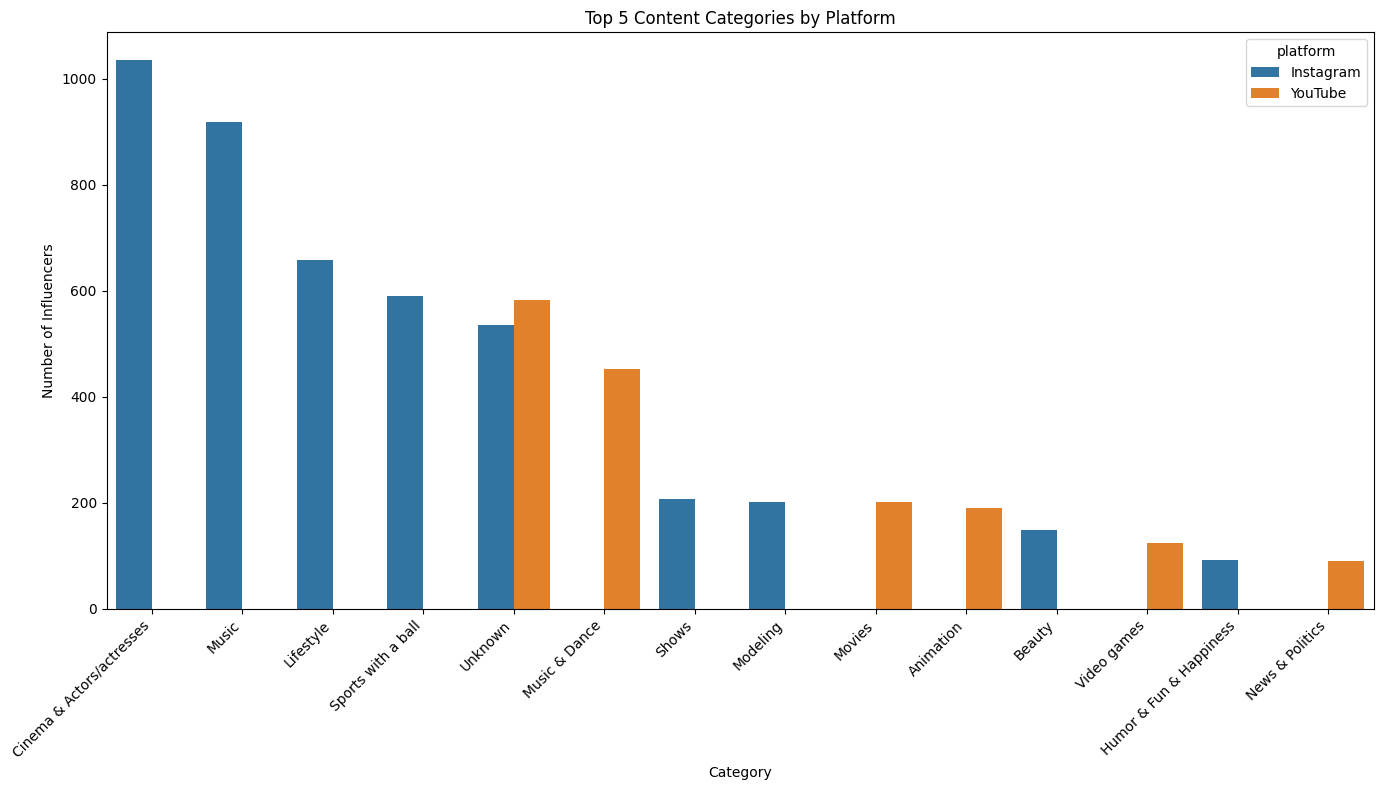

In [6]:
def analyze_content_categories(insta_df, tiktok_df, youtube_df,
                               insta_category_col_1='category_1', insta_category_col_2='category_2',
                               tiktok_category_col_1='category_1', tiktok_category_col_2='category_2',
                               yt_category_col_1='category_1', yt_category_col_2='category_2'):
    """
    Analyzes and compares content category distribution across Instagram, TikTok, and YouTube.

    Args:
        insta_df (pd.DataFrame): DataFrame containing Instagram influencer data.
        tiktok_df (pd.DataFrame): DataFrame containing TikTok influencer data.
        youtube_df (pd.DataFrame): DataFrame containing YouTube influencer data.
        insta_category_col_1 (str): Name of the primary category column in insta_df.
        insta_category_col_2 (str): Name of the secondary category column in insta_df (optional).
        tiktok_category_col_1 (str): Name of the primary category column in tiktok_df.
        tiktok_category_col_2 (str): Name of the secondary category column in tiktok_df (optional).
        yt_category_col_1 (str): Name of the primary category column in youtube_df.
        yt_category_col_2 (str): Name of the secondary category column in youtube_df (optional).
    """
    all_categories_data = []

    print("--- Starting Content Category Analysis ---")

    # --- Process Instagram Categories ---
    if insta_df is not None and insta_category_col_1 in insta_df.columns:
        print(f"\n--- Instagram Category Summary ({insta_df.shape[0]} rows) ---")
        insta_categories = insta_df[insta_category_col_1].dropna().str.strip()
        category_counts = insta_categories.value_counts().reset_index()
        category_counts.columns = ['category', 'count']
        category_counts['platform'] = 'Instagram'
        all_categories_data.append(category_counts)
        print("Top 10 Instagram Categories:")
        print(category_counts.head(10).to_string(index=False))
        if insta_category_col_2 and insta_category_col_2 in insta_df.columns:
            secondary_categories = insta_df[insta_category_col_2].dropna().str.strip()
            print("\nTop 5 Instagram Secondary Categories:")
            print(secondary_categories.value_counts().head(5).to_string())
    else:
        print("Instagram data or primary category column missing. Skipping Instagram category analysis.")

    # --- Process TikTok Categories ---
    if tiktok_df is not None and tiktok_category_col_1 in tiktok_df.columns:
        print(f"\n--- TikTok Category Summary ({tiktok_df.shape[0]} rows) ---")
        tiktok_categories = tiktok_df[tiktok_category_col_1].dropna().str.strip()
        category_counts = tiktok_categories.value_counts().reset_index()
        category_counts.columns = ['category', 'count']
        category_counts['platform'] = 'TikTok'
        all_categories_data.append(category_counts)
        print("Top 10 TikTok Categories:")
        print(category_counts.head(10).to_string(index=False))
        if tiktok_category_col_2 and tiktok_category_col_2 in tiktok_df.columns:
            secondary_categories = tiktok_df[tiktok_category_col_2].dropna().str.strip()
            print("\nTop 5 TikTok Secondary Categories:")
            print(secondary_categories.value_counts().head(5).to_string())
    else:
        print("TikTok data or primary category column missing. Skipping TikTok category analysis.")

    # --- Process YouTube Categories ---
    if youtube_df is not None and yt_category_col_1 in youtube_df.columns:
        print(f"\n--- YouTube Category Summary ({youtube_df.shape[0]} rows) ---")
        youtube_categories = youtube_df[yt_category_col_1].dropna().str.strip()
        category_counts = youtube_categories.value_counts().reset_index()
        category_counts.columns = ['category', 'count']
        category_counts['platform'] = 'YouTube'
        all_categories_data.append(category_counts)
        print("Top 10 YouTube Categories:")
        print(category_counts.head(10).to_string(index=False))
        if yt_category_col_2 and yt_category_col_2 in youtube_df.columns:
            secondary_categories = youtube_df[yt_category_col_2].dropna().str.strip()
            print("\nTop 5 YouTube Secondary Categories:")
            print(secondary_categories.value_counts().head(5).to_string())
    else:
        print("YouTube data or primary category column missing. Skipping YouTube category analysis.")

    # --- Combined Category Analysis ---
    if all_categories_data:
        combined_categories_df = pd.concat(all_categories_data, ignore_index=True)

        print("\n--- Comparative Category Analysis Across Platforms ---")
        print("\nTotal Unique Categories Across All Platforms:", combined_categories_df['category'].nunique())
        print("\nOverall Top 10 Categories (Aggregated across platforms):")
        print(combined_categories_df.groupby('category')['count'].sum().sort_values(ascending=False).head(10).to_string())

        # Visualize Top N Categories per Platform
        num_top_categories_to_plot = 5 # You can change this
        plt.figure(figsize=(14, 8))
        sns.barplot(
            x='category',
            y='count',
            hue='platform',
            data=combined_categories_df.groupby(['platform', 'category'])['count'].sum().reset_index().nlargest(num_top_categories_to_plot * 3, 'count') # Get top N overall, to ensure common categories are shown
        )
        plt.title(f'Top {num_top_categories_to_plot} Content Categories by Platform')
        plt.xlabel('Category')
        plt.ylabel('Number of Influencers')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Heatmap (if many categories and you want to see overlap) - optional, might be too busy
        if combined_categories_df['category'].nunique() < 30: # Only if not too many categories
            category_pivot = combined_categories_df.pivot_table(index='category', columns='platform', values='count', fill_value=0)
            plt.figure(figsize=(10, len(category_pivot) * 0.5))
            sns.heatmap(category_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
            plt.title('Category Presence Across Platforms')
            plt.tight_layout()
            plt.show()

    else:
        print("No valid category data could be consolidated for comparative analysis. Check individual platform data and column names.")

# --- Example Data Loading (Replace with your actual data loading) ---
# IMPORTANT: These are placeholders. You MUST replace these with your actual
# pd.read_csv() or pd.read_excel() calls to load your dataframes.
# Make sure your CSV files are in the same directory as your Python script,
# or provide the full path to the files.

try:
    # Ensure these columns exist in your Instagram data
    insta_df = pd.read_csv('./Clean_Data/merged_instagram_data_cleaned.csv')
    print("Instagram data loaded.")
except FileNotFoundError:
    print("instagram_data.csv not found. Please check the file path.")
    insta_df = None

try:
    # Ensure these columns exist in your TikTok data
    tiktok_df = pd.read_csv('./Clean_Data/merged_tiktok_data_cleaned.csv')
    print("TikTok data loaded.")
except FileNotFoundError:
    print("tiktok_data.csv not found. Please check the file path.")
    tiktok_df = None

try:
    # Ensure these columns exist in your YouTube data
    youtube_df = pd.read_csv('./Clean_Data/merged_youtube_data_cleaned.csv')
    print("YouTube data loaded.")
except FileNotFoundError:
    print("youtube_data.csv not found. Please check the file path.")
    youtube_df = None

# --- Call the Main Analysis Function ---
# This is where you actually run the analysis with your loaded DataFrames
# Ensure the column names here EXACTLY match the column names in your loaded DataFrames.
# If your category column is named 'Content_Type' in TikTok, change 'tiktok_category_col_1' below.
analyze_content_categories(
    insta_df=insta_df,
    tiktok_df=tiktok_df,
    youtube_df=youtube_df,
    insta_category_col_1='category_1', # Adjust if your Instagram category column is different
    insta_category_col_2='category_2', # Adjust if your Instagram secondary category column is different (or set to None if not present)
    tiktok_category_col_1='category_1', # Adjust if your TikTok category column is different
    tiktok_category_col_2='category_2', # Adjust if your TikTok secondary category column is different (or set to None if not present)
    yt_category_col_1='category_1',     # Adjust if your YouTube category column is different
    yt_category_col_2='category_2'      # Adjust if your YouTube secondary category column is different (or set to None if not present)
)

Instagram data loaded.
TikTok data loaded.
YouTube data loaded.
--- Starting Basic Correlation Analysis ---

Skipping Instagram correlation analysis: No valid numeric data after cleaning.

--- TikTok Correlation Analysis ---
Correlations with subscribers:
likes_avg      NaN
comments_avg   NaN
views_avg      NaN
shares_avg     NaN


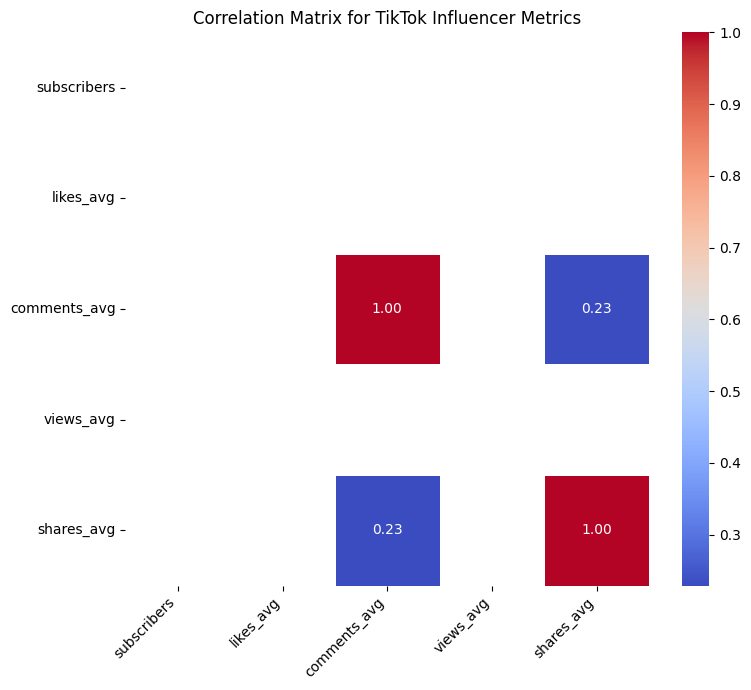


--- YouTube Correlation Analysis ---
Correlations with subscribers:
avg_likes      NaN
avg_comments   NaN
avg_views      NaN


c:\Users\lualg\anaconda3\envs\streamlit_pycaret\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\lualg\anaconda3\envs\streamlit_pycaret\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


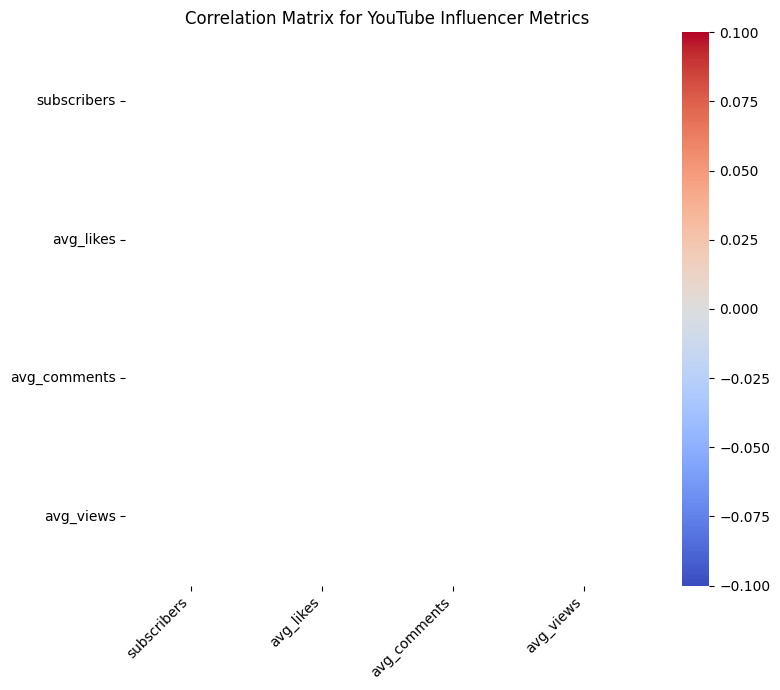

In [7]:
def analyze_correlations(insta_df, tiktok_df, youtube_df,
                         insta_numerical_cols=['subscribers', 'likes_avg', 'comments_avg', 'views_avg'],
                         tiktok_numerical_cols=['subscribers', 'likes_avg', 'comments_avg', 'views_avg', 'shares_avg'],
                         yt_numerical_cols=['subscribers', 'avg_likes', 'avg_comments', 'avg_views']):
    """
    Analyzes and visualizes correlations between numerical metrics for influencers on each platform.

    Args:
        insta_df (pd.DataFrame): DataFrame containing Instagram influencer data.
        tiktok_df (pd.DataFrame): DataFrame containing TikTok influencer data.
        youtube_df (pd.DataFrame): DataFrame containing YouTube influencer data.
        insta_numerical_cols (list): List of numerical column names to analyze for Instagram.
        tiktok_numerical_cols (list): List of numerical column names to analyze for TikTok.
        yt_numerical_cols (list): List of numerical column names to analyze for YouTube.
    """
    print("--- Starting Basic Correlation Analysis ---")

    platforms_data = {
        'Instagram': {'df': insta_df, 'cols': insta_numerical_cols, 'name_col': 'instagram_name'},
        'TikTok': {'df': tiktok_df, 'cols': tiktok_numerical_cols, 'name_col': 'tiktoker_name'},
        'YouTube': {'df': youtube_df, 'cols': yt_numerical_cols, 'name_col': 'youtuber_name'}
    }

    for platform_name, data in platforms_data.items():
        df = data['df']
        cols = data['cols']
        name_col = data['name_col']

        if df is not None:
            # Check if all required columns exist in the DataFrame
            actual_cols = [col for col in cols if col in df.columns]
            if len(actual_cols) < 2: # Need at least two columns to calculate correlation
                print(f"\nSkipping {platform_name} correlation analysis: Not enough relevant numerical columns found.")
                continue

            # Select relevant columns and convert to numeric, coercing errors to NaN
            df_numeric = df[actual_cols].apply(pd.to_numeric, errors='coerce')

            # Drop rows with NaN values for correlation calculation to avoid issues
            # (Correlations are calculated on non-NaN pairs, but dropping them makes the matrix cleaner)
            df_numeric_cleaned = df_numeric.dropna()

            if df_numeric_cleaned.empty or len(df_numeric_cleaned) < 2:
                print(f"\nSkipping {platform_name} correlation analysis: No valid numeric data after cleaning.")
                continue

            print(f"\n--- {platform_name} Correlation Analysis ---")

            # Calculate the correlation matrix
            correlation_matrix = df_numeric_cleaned.corr()

            # Print correlations with 'subscribers' (or equivalent first column in list)
            if actual_cols[0] in correlation_matrix.index:
                print(f"Correlations with {actual_cols[0]}:")
                # Exclude self-correlation (correlation with itself is 1)
                print(correlation_matrix[actual_cols[0]].drop(actual_cols[0]).to_string())
            else:
                print(f"'{actual_cols[0]}' not found as an index in correlation matrix.")


            # Visualize the correlation matrix using a heatmap
            plt.figure(figsize=(8, 7))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
            plt.title(f'Correlation Matrix for {platform_name} Influencer Metrics')
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()

        else:
            print(f"DataFrame for {platform_name} is None. Skipping correlation analysis.")

# --- Example Data Loading (Replace with your actual data loading) ---
# IMPORTANT: These are placeholders. You MUST replace these with your actual
# pd.read_csv() or pd.read_excel() calls to load your dataframes.
# Make sure your CSV files are in the same directory as your Python script,
# or provide the full path to the files.

try:
    # Ensure these columns exist in your Instagram data
    insta_df = pd.read_csv('./Clean_Data/merged_instagram_data_cleaned.csv')
    print("Instagram data loaded.")
except FileNotFoundError:
    print("instagram_data.csv not found. Please check the file path.")
    insta_df = None

try:
    # Ensure these columns exist in your TikTok data
    tiktok_df = pd.read_csv('./Clean_Data/merged_tiktok_data_cleaned.csv')
    print("TikTok data loaded.")
except FileNotFoundError:
    print("tiktok_data.csv not found. Please check the file path.")
    tiktok_df = None

try:
    # Ensure these columns exist in your YouTube data
    youtube_df = pd.read_csv('./Clean_Data/merged_youtube_data_cleaned.csv')
    print("YouTube data loaded.")
except FileNotFoundError:
    print("youtube_data.csv not found. Please check the file path.")
    youtube_df = None

# --- Call the Main Analysis Function ---
# This is where you actually run the analysis with your loaded DataFrames
# VERY IMPORTANT: Adjust the lists below to EXACTLY match the numerical column names
# in YOUR specific CSV files for subscribers and interaction metrics.
analyze_correlations(
    insta_df=insta_df,
    tiktok_df=tiktok_df,
    youtube_df=youtube_df,
    insta_numerical_cols=['subscribers', 'likes_avg', 'comments_avg', 'views_avg'], # Adjust if different
    tiktok_numerical_cols=['subscribers', 'likes_avg', 'comments_avg', 'views_avg', 'shares_avg'], # Adjust if different
    yt_numerical_cols=['subscribers', 'avg_likes', 'avg_comments', 'avg_views'] # Adjust if different, e.g., 'likes_avg', 'comments_avg' etc.
)

Instagram data loaded.
TikTok data loaded.
YouTube data loaded.
--- Starting Influencer Tier Analysis ---

--- Influencer Tier Distribution (Overall) ---
Nano (1K-10K)       10891
Micro (10K-100K)        0
Mid (100K-1M)           0
Macro (1M-10M)          0
Mega (10M+)             0
Unknown                 0

--- Influencer Tier Distribution by Platform ---
Percentage of Influencers in Each Tier by Platform:
tier       Nano (1K-10K)  Micro (10K-100K)  Mid (100K-1M)  Macro (1M-10M)  Mega (10M+)  Unknown
platform                                                                                       
Instagram        100.00%             0.00%          0.00%           0.00%        0.00%    0.00%
TikTok           100.00%             0.00%          0.00%           0.00%        0.00%    0.00%
YouTube          100.00%             0.00%          0.00%           0.00%        0.00%    0.00%


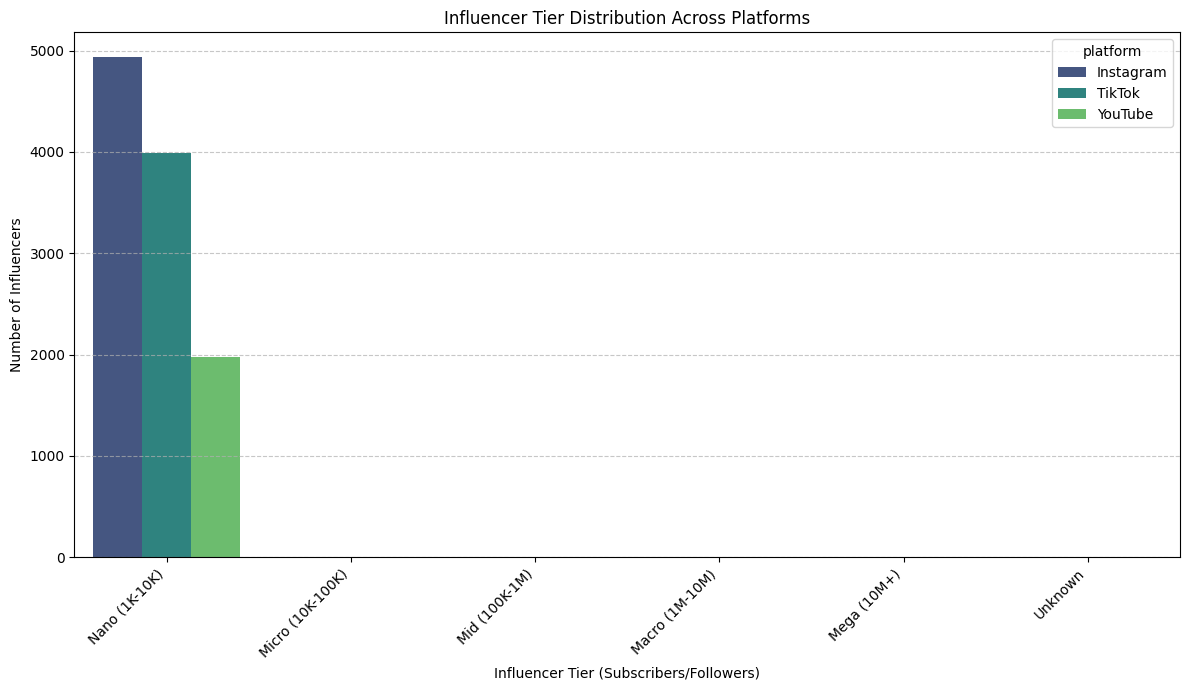

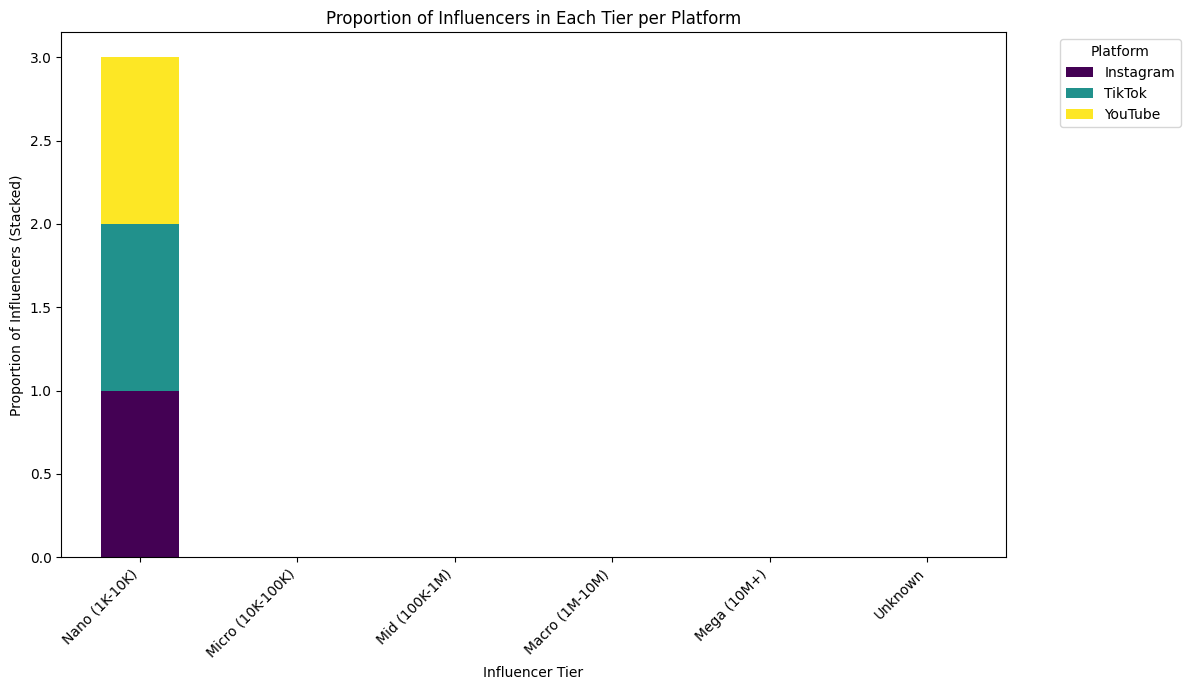

In [8]:
# --- 1. Helper function to define influencer tiers ---
def define_influencer_tier(subscribers):
    """
    Categorizes an influencer into a tier based on their subscriber count.
    Adjust these ranges as needed based on your data distribution or industry standards.
    """
    if pd.isna(subscribers):
        return 'Unknown'
    subscribers = int(subscribers) # Ensure it's an integer for comparison
    if subscribers < 10000:
        return 'Nano (1K-10K)' # Often starts at 1k, but some definitions go lower
    elif subscribers < 100000:
        return 'Micro (10K-100K)'
    elif subscribers < 1000000:
        return 'Mid (100K-1M)'
    elif subscribers < 10000000:
        return 'Macro (1M-10M)'
    else:
        return 'Mega (10M+)'

# --- 2. Main Analysis Function ---
def analyze_influencer_tiers(insta_df, tiktok_df, youtube_df,
                             insta_subscriber_col='subscribers', insta_name_col='instagram_name',
                             tiktok_subscriber_col='subscribers', tiktok_name_col='tiktoker_name',
                             yt_subscriber_col='subscribers', yt_name_col='youtuber_name'):
    """
    Analyzes and compares the distribution of influencer tiers across platforms.

    Args:
        insta_df (pd.DataFrame): DataFrame containing Instagram influencer data.
        tiktok_df (pd.DataFrame): DataFrame containing TikTok influencer data.
        youtube_df (pd.DataFrame): DataFrame containing YouTube influencer data.
        insta_subscriber_col (str): Name of the subscribers column in insta_df.
        insta_name_col (str): Name of the influencer name column in insta_df.
        tiktok_subscriber_col (str): Name of the subscribers column in tiktok_df.
        tiktok_name_col (str): Name of the influencer name column in tiktok_df.
        yt_subscriber_col (str): Name of the subscribers column in youtube_df.
        yt_name_col (str): Name of the influencer name column in youtube_df.
    """
    all_influencers_data = []

    print("--- Starting Influencer Tier Analysis ---")

    # --- Process Instagram data ---
    if insta_df is not None and insta_subscriber_col in insta_df.columns and insta_name_col in insta_df.columns:
        temp_df = insta_df[[insta_name_col, insta_subscriber_col]].copy()
        temp_df.columns = ['influencer_name', 'subscribers']
        temp_df['platform'] = 'Instagram'
        all_influencers_data.append(temp_df)
    else:
        print("Instagram data or key columns missing for tier analysis. Skipping Instagram.")

    # --- Process TikTok data ---
    if tiktok_df is not None and tiktok_subscriber_col in tiktok_df.columns and tiktok_name_col in tiktok_df.columns:
        temp_df = tiktok_df[[tiktok_name_col, tiktok_subscriber_col]].copy()
        temp_df.columns = ['influencer_name', 'subscribers']
        temp_df['platform'] = 'TikTok'
        all_influencers_data.append(temp_df)
    else:
        print("TikTok data or key columns missing for tier analysis. Skipping TikTok.")

    # --- Process YouTube data ---
    if youtube_df is not None and yt_subscriber_col in youtube_df.columns and yt_name_col in youtube_df.columns:
        temp_df = youtube_df[[yt_name_col, yt_subscriber_col]].copy()
        temp_df.columns = ['influencer_name', 'subscribers']
        temp_df['platform'] = 'YouTube'
        all_influencers_data.append(temp_df)
    else:
        print("YouTube data or key columns missing for tier analysis. Skipping YouTube.")

    # --- Combine data and apply tiering ---
    if all_influencers_data:
        combined_influencers_df = pd.concat(all_influencers_data, ignore_index=True)

        # Convert subscribers to numeric, coercing errors
        combined_influencers_df['subscribers'] = pd.to_numeric(combined_influencers_df['subscribers'], errors='coerce')
        combined_influencers_df.dropna(subset=['subscribers'], inplace=True)

        if combined_influencers_df.empty:
            print("\nCombined influencer DataFrame is empty after cleaning. Cannot perform tier analysis.")
            return

        # Apply the tier definition function
        combined_influencers_df['tier'] = combined_influencers_df['subscribers'].apply(define_influencer_tier)

        # Define a specific order for tiers for consistent plotting
        tier_order = ['Nano (1K-10K)', 'Micro (10K-100K)', 'Mid (100K-1M)', 'Macro (1M-10M)', 'Mega (10M+)', 'Unknown']
        combined_influencers_df['tier'] = pd.Categorical(combined_influencers_df['tier'], categories=tier_order, ordered=True)


        print("\n--- Influencer Tier Distribution (Overall) ---")
        overall_tier_counts = combined_influencers_df['tier'].value_counts().sort_index()
        print(overall_tier_counts.to_string())

        print("\n--- Influencer Tier Distribution by Platform ---")
        platform_tier_counts = combined_influencers_df.groupby('platform')['tier'].value_counts(normalize=True).unstack(fill_value=0) * 100
        print("Percentage of Influencers in Each Tier by Platform:")
        print(platform_tier_counts.to_string(float_format="%.2f%%"))

        # Visualize Tier Distribution by Platform
        plt.figure(figsize=(12, 7))
        sns.countplot(x='tier', hue='platform', data=combined_influencers_df, palette='viridis', order=tier_order)
        plt.title('Influencer Tier Distribution Across Platforms')
        plt.xlabel('Influencer Tier (Subscribers/Followers)')
        plt.ylabel('Number of Influencers')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        # Stacked Bar Chart for Percentage View
        platform_tier_counts_plot = combined_influencers_df.groupby('platform')['tier'].value_counts(normalize=True).unstack(fill_value=0)
        platform_tier_counts_plot = platform_tier_counts_plot[tier_order].T # Transpose and ensure order
        platform_tier_counts_plot.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='viridis')
        plt.title('Proportion of Influencers in Each Tier per Platform')
        plt.xlabel('Influencer Tier')
        plt.ylabel('Proportion of Influencers (Stacked)')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    else:
        print("No valid influencer data could be consolidated for tier analysis. Check individual platform data and column names.")

# --- Example Data Loading (Replace with your actual data loading) ---
# IMPORTANT: These are placeholders. You MUST replace these with your actual
# pd.read_csv() or pd.read_excel() calls to load your dataframes.

try:
    # Ensure these columns exist in your Instagram data
    insta_df = pd.read_csv('./Clean_Data/merged_instagram_data_cleaned.csv')
    print("Instagram data loaded.")
except FileNotFoundError:
    print("instagram_data.csv not found. Please check the file path.")
    insta_df = None

try:
    # Ensure these columns exist in your TikTok data
    tiktok_df = pd.read_csv('./Clean_Data/merged_tiktok_data_cleaned.csv')
    print("TikTok data loaded.")
except FileNotFoundError:
    print("tiktok_data.csv not found. Please check the file path.")
    tiktok_df = None

try:
    # Ensure these columns exist in your YouTube data
    youtube_df = pd.read_csv('./Clean_Data/merged_youtube_data_cleaned.csv')
    print("YouTube data loaded.")
except FileNotFoundError:
    print("youtube_data.csv not found. Please check the file path.")
    youtube_df = None

# --- Call the Main Analysis Function ---
# Ensure the column names here EXACTLY match the column names in your loaded DataFrames.
analyze_influencer_tiers(
    insta_df=insta_df,
    tiktok_df=tiktok_df,
    youtube_df=youtube_df,
    insta_subscriber_col='subscribers', # Adjust if different
    insta_name_col='instagram_name',
    tiktok_subscriber_col='subscribers',# Adjust if different
    tiktok_name_col='tiktoker_name',
    yt_subscriber_col='subscribers',    # Adjust if different
    yt_name_col='youtuber_name'
)